# Concrete Compressive Strength - Regression  & Classification

In this project, we have a dataset where the mixture ratios of components affecting concrete strength are provided. We will create a model that predicts concrete strength based on the given component amounts by using regression algorithms to analyze the dataset.

<img src="https://cdnassets.hw.net/cf/1c/14dccada4eb0adeaecc465f0d6ab/concrete-construction-smartrock-sensor-1.jpg" >




### Data Dictionary

1. Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
2. Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
3. Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
4. Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
5. Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
6. Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
7. Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
8. Age -- quantitative -- Day (1~365) -- Input Variable
9. Concrete compressive strength -- quantitative -- MPa -- Output Variable 

<a href="https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength">Click here to download dataset</a>

### Import Dataset

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)

In [2]:
df=pd.read_excel('Concrete_Data.xls')

### EDA

In [3]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
df.columns = ['Cement', 'Slag', 'FlyAsh', 'Water', 'Plasticizer',  'CoarseAgg', 'FineAgg', 'Age', 'Strength'];

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cement       1030 non-null   float64
 1   Slag         1030 non-null   float64
 2   FlyAsh       1030 non-null   float64
 3   Water        1030 non-null   float64
 4   Plasticizer  1030 non-null   float64
 5   CoarseAgg    1030 non-null   float64
 6   FineAgg      1030 non-null   float64
 7   Age          1030 non-null   int64  
 8   Strength     1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [6]:
df.columns

Index(['Cement', 'Slag', 'FlyAsh', 'Water', 'Plasticizer', 'CoarseAgg',
       'FineAgg', 'Age', 'Strength'],
      dtype='object')

In [7]:
df.describe()

,Cement,Slag,FlyAsh,Water,Plasticizer,CoarseAgg,FineAgg,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [8]:
df.corr(numeric_only=True)

,Cement,Slag,FlyAsh,Water,Plasticizer,CoarseAgg,FineAgg,Age,Strength
Cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
Slag,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
FlyAsh,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
Water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Plasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
CoarseAgg,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
FineAgg,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
Age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
Strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


<Axes: >

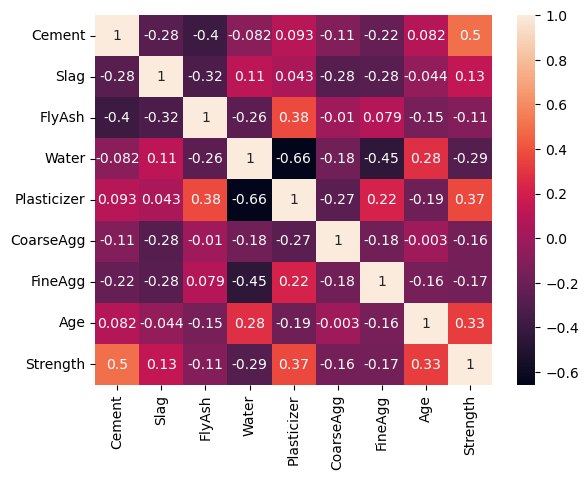

In [9]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

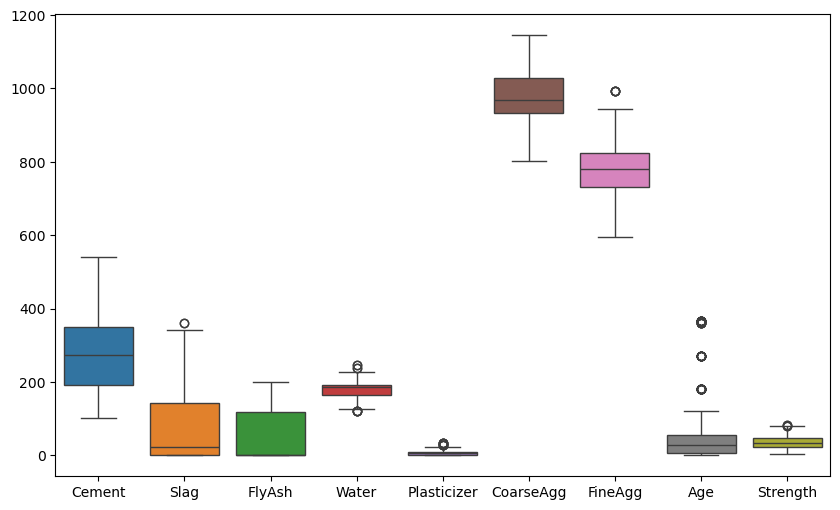

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df);

### Regression

Let's determine our x and y values

In [11]:
x=df.drop('Strength',axis=1)
y=df['Strength']

We will use algo test algorithm and apply various regression library to the data and we will find which library give us the best score.

In [12]:
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        #I define all models
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,ada,kn,dt,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #I create a dataframe to tabulate the error and accuracy rates
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #I place my accuracy and error rates in the table named result
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #sorts and returns the result table I created according to the accuracy rate (r2_score)
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [13]:
algo_test(x,y)

,R_Squared,RMSE,MAE
mlp_regressor,8.245422e-01,6.723998e+00,5.244696e+00
Extra Tree,8.063062e-01,7.064789e+00,4.768814e+00
Decision Tree,8.033534e-01,7.118434e+00,4.585053e+00
KNeighborsRegressor,7.696080e-01,7.705040e+00,6.316907e+00
AdaBoost,7.367656e-01,8.235928e+00,6.451223e+00
ElasticNet,6.276324e-01,9.795514e+00,7.743307e+00
Lasso,6.275772e-01,9.796240e+00,7.743496e+00
Ridge,6.275418e-01,9.796706e+00,7.745389e+00
Linear,6.275416e-01,9.796708e+00,7.745393e+00
SVR,2.320261e-01,1.406742e+01,1.150715e+01


We uses 11 different convantional regression algorithm and find that Decision Tree give us best value. Let's use Deep Learning too.

In [14]:
x=df.drop('Strength',axis=1)
y=df['Strength']

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20, random_state=42)

In [17]:
model=Sequential()
model.add(Dense(120, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [18]:
history=model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, epochs=500, verbose=1)

Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 882.2922 - val_loss: 357.7998
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 357.7702 - val_loss: 258.3527
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 257.0822 - val_loss: 178.0267
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 186.9602 - val_loss: 151.8738
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 141.3815 - val_loss: 125.2919
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 121.0973 - val_loss: 113.2155
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 112.8896 - val_loss: 91.1521
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 100.0717 - val_loss: 83.8702
Epoch 9/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 103.4596 - val_loss: 79.0403
Epoch 10/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 93.1076 - val_loss: 73.3747
Epoch 11/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 77.5552 - val_loss: 70.8730
Epoch 12/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/st

In [19]:
tahmin=model.predict(x_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [20]:
from sklearn.metrics import r2_score,mean_squared_error

In [21]:
r2_score(y_test,tahmin)

0.8279079505576337

In [22]:
mean_squared_error(y_test,tahmin)**.5

6.6591941368758745

In [23]:
loss_f=pd.DataFrame(history.history)

<Axes: >

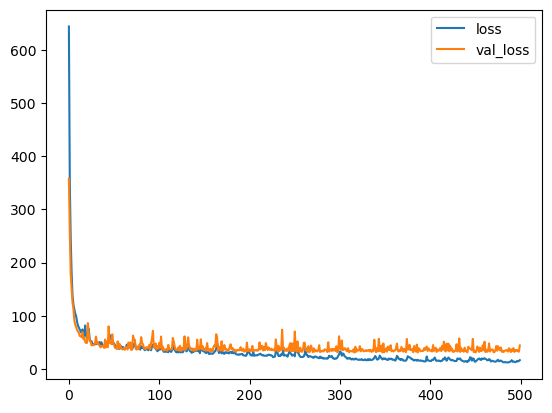

In [24]:
loss_f.plot()

### Classification

Now, we will build a classification model but we do not have suitable data for classification. So, we will make some adjustments.

In [25]:
def green_classifier(s):
    """
    Use numeric data to create a Green categorical feature.
    """

    if (s.Slag + s.FlyAsh < 150.0) and (s.Plasticizer < 10.0):
        return "n/a"
    else:
        return "green"


def strength_classifer(x):
    """
    Use numeric data to create a ConcreteClass categorical feature.  This is
    based on "CIP 35 - Testing Compressive Strength of Concrete", National
    Ready Mixed Concrete Association (www.nrmca.org), 2003 & 2014.
    """

    if x < 17.0:
        return "non-structural"
    elif x < 28.0:
        return "residential"
    elif x < 70.0:
        return "commercial"
    else:
        return "high-strength"


df["Green"] = df.apply(green_classifier, axis=1)
df["ConcreteClass"] = df.Strength.apply(strength_classifer)

# convert Plasticizer to text (the numeric values are embedded in Green)
df.Plasticizer = df.Plasticizer.apply(lambda x: "yes" if x > 0 else "no")

# remove Strength feature as replaced by categorical target ConcreteClass
df.drop("Strength", axis=1, inplace=True)

In [26]:
df.head()

,Cement,Slag,FlyAsh,Water,Plasticizer,CoarseAgg,FineAgg,Age,Green,ConcreteClass
0,540.0,0.0,0.0,162.0,yes,1040.0,676.0,28,n/a,high-strength
1,540.0,0.0,0.0,162.0,yes,1055.0,676.0,28,n/a,commercial
2,332.5,142.5,0.0,228.0,no,932.0,594.0,270,n/a,commercial
3,332.5,142.5,0.0,228.0,no,932.0,594.0,365,n/a,commercial
4,198.6,132.4,0.0,192.0,no,978.4,825.5,360,n/a,commercial


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Cement         1030 non-null   float64
 1   Slag           1030 non-null   float64
 2   FlyAsh         1030 non-null   float64
 3   Water          1030 non-null   float64
 4   Plasticizer    1030 non-null   object 
 5   CoarseAgg      1030 non-null   float64
 6   FineAgg        1030 non-null   float64
 7   Age            1030 non-null   int64  
 8   Green          1030 non-null   object 
 9   ConcreteClass  1030 non-null   object 
dtypes: float64(6), int64(1), object(3)
memory usage: 80.6+ KB


<Axes: xlabel='ConcreteClass', ylabel='count'>

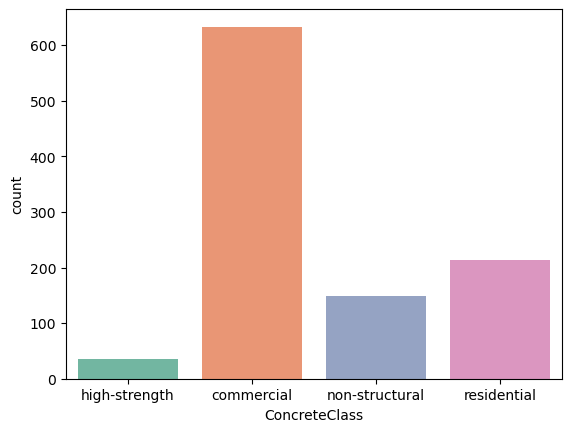

In [28]:
sns.countplot(x='ConcreteClass',data=df,palette='Set2')

We have now a column that named ConcreteClass. We can build our classification model aroud this column.

In [29]:
concrete_class_dict = {
    'high-strength': 0,
    'commercial': 1,
    'non-structural': 2,
    'residential': 3
}

In [30]:
df['ConcreteClass'] = df['ConcreteClass'].map(concrete_class_dict)

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [32]:
x=df.drop('ConcreteClass',axis=1)
y=df[['ConcreteClass']]

To train our model, we will convert the data in the object datatype to numeric data.

In [33]:
x=pd.get_dummies(x,drop_first=True)

In [34]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42) #We split data %80 for train and %20 for test

In [35]:
g=GaussianNB()
b=BernoulliNB()
l=LogisticRegression()
d=DecisionTreeClassifier()
r=RandomForestClassifier()
h=GradientBoostingClassifier()
k=KNeighborsClassifier()

* GaussianNB

In [36]:
g.fit(x_train,y_train)

GaussianNB()

In [37]:
gtahmin=g.predict(x_test)

In [38]:
accuracy_score(gtahmin,y_test)

0.6796116504854369

In [39]:
confusion_matrix(gtahmin,y_test)

array([[ 4,  8,  0,  1],
       [ 2, 97,  3,  7],
       [ 0,  9, 26, 14],
       [ 0, 19,  3, 13]], dtype=int64)

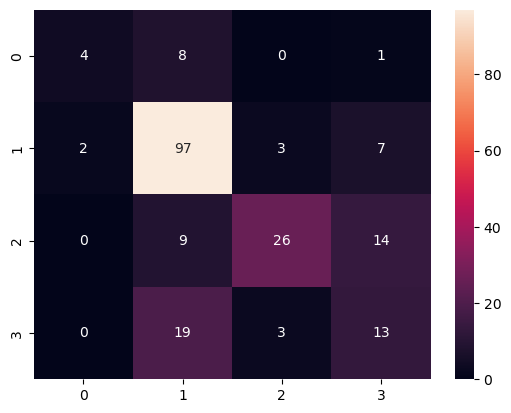

In [40]:
sns.heatmap(confusion_matrix(gtahmin,y_test), annot=True);

In [41]:
print(classification_report(gtahmin,y_test))

              precision    recall  f1-score   support

           0       0.67      0.31      0.42        13
           1       0.73      0.89      0.80       109
           2       0.81      0.53      0.64        49
           3       0.37      0.37      0.37        35

    accuracy                           0.68       206
   macro avg       0.64      0.52      0.56       206
weighted avg       0.68      0.68      0.67       206



* BernoulliNB

In [42]:
b.fit(x_train,y_train)

BernoulliNB()

In [43]:
btahmin=b.predict(x_test)

In [44]:
accuracy_score(btahmin,y_test)

0.6456310679611651

In [45]:
confusion_matrix(btahmin,y_test)

array([[  0,   0,   0,   0],
       [  6, 133,  32,  35],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0]], dtype=int64)

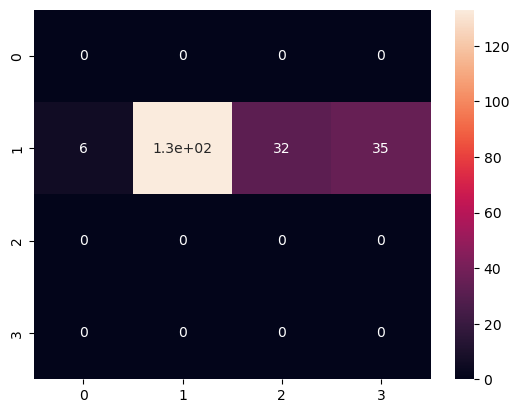

In [46]:
sns.heatmap(confusion_matrix(btahmin,y_test), annot=True);

In [47]:
print(classification_report(btahmin,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.65      0.78       206
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.65       206
   macro avg       0.25      0.16      0.20       206
weighted avg       1.00      0.65      0.78       206



* LogisticRegression

In [48]:
l.fit(x_train, y_train)

LogisticRegression()

In [49]:
ltahmin=l.predict(x_test)

In [50]:
accuracy_score(ltahmin,y_test)

0.7961165048543689

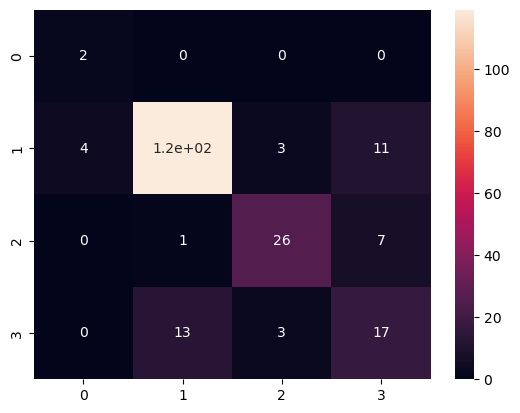

In [51]:
confusion_matrix(ltahmin,y_test)
sns.heatmap(confusion_matrix(ltahmin,y_test), annot=True);

In [52]:
print(classification_report(ltahmin,y_test))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       0.89      0.87      0.88       137
           2       0.81      0.76      0.79        34
           3       0.49      0.52      0.50        33

    accuracy                           0.80       206
   macro avg       0.63      0.79      0.67       206
weighted avg       0.81      0.80      0.80       206



* DecisionTreeClassifier

In [53]:
d.fit(x_train, y_train)

DecisionTreeClassifier()

In [54]:
dtahmin=d.predict(x_test)

In [55]:
accuracy_score(dtahmin,y_test)

0.8446601941747572

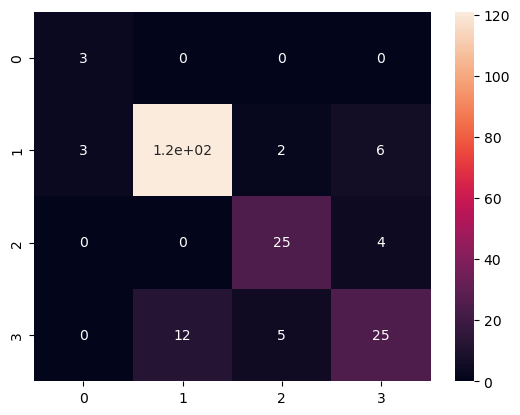

In [56]:
confusion_matrix(dtahmin,y_test)
sns.heatmap(confusion_matrix(dtahmin,y_test), annot=True);

In [57]:
print(classification_report(dtahmin,y_test))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         3
           1       0.91      0.92      0.91       132
           2       0.78      0.86      0.82        29
           3       0.71      0.60      0.65        42

    accuracy                           0.84       206
   macro avg       0.73      0.84      0.76       206
weighted avg       0.85      0.84      0.84       206



* RandomForestClassifier

In [58]:
r.fit(x_train, y_train)

RandomForestClassifier()

In [59]:
rtahmin=r.predict(x_test)

In [60]:
accuracy_score(rtahmin,y_test)

0.883495145631068

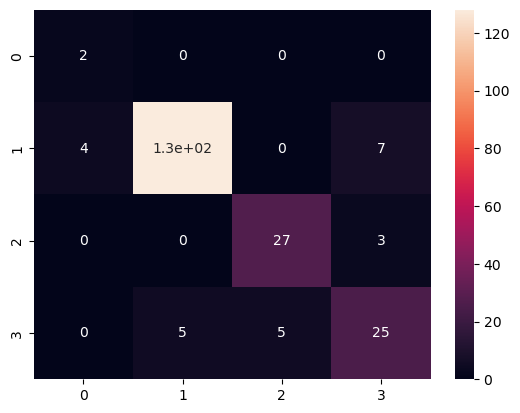

In [61]:
confusion_matrix(rtahmin,y_test)
sns.heatmap(confusion_matrix(rtahmin,y_test), annot=True);

In [62]:
print(classification_report(rtahmin,y_test))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       0.96      0.92      0.94       139
           2       0.84      0.90      0.87        30
           3       0.71      0.71      0.71        35

    accuracy                           0.88       206
   macro avg       0.71      0.88      0.76       206
weighted avg       0.90      0.88      0.89       206



*  GradientBoostingClassifier

In [63]:
h.fit(x_train, y_train)

GradientBoostingClassifier()

In [64]:
htahmin=h.predict(x_test)

In [65]:
accuracy_score(htahmin,y_test)

0.883495145631068

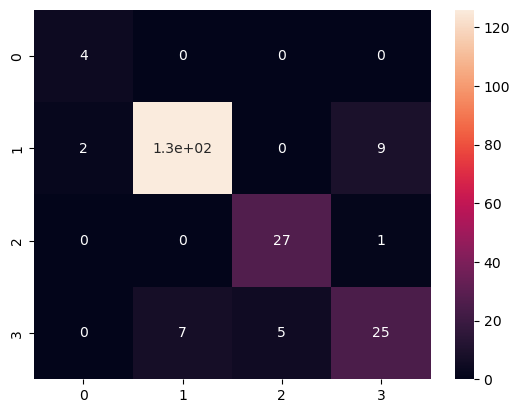

In [66]:
confusion_matrix(htahmin,y_test)
sns.heatmap(confusion_matrix(htahmin,y_test), annot=True);

In [67]:
print(classification_report(htahmin,y_test))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       0.95      0.92      0.93       137
           2       0.84      0.96      0.90        28
           3       0.71      0.68      0.69        37

    accuracy                           0.88       206
   macro avg       0.79      0.89      0.83       206
weighted avg       0.89      0.88      0.88       206



* KNeighborsClassifier

In [68]:
k.fit(x_train, y_train)

KNeighborsClassifier()

In [69]:
ktahmin=k.predict(x_test)

In [70]:
accuracy_score(ktahmin,y_test)

0.7233009708737864

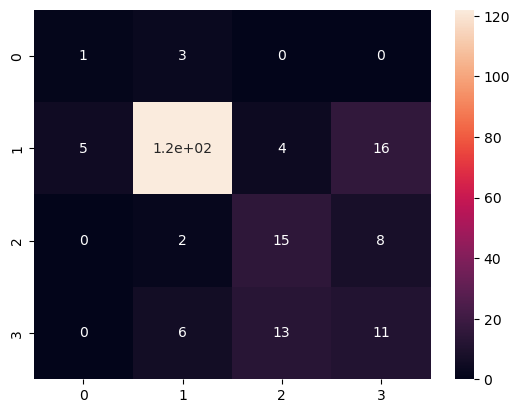

In [71]:
confusion_matrix(ktahmin,y_test)
sns.heatmap(confusion_matrix(ktahmin,y_test), annot=True);

In [72]:
print(classification_report(ktahmin,y_test))

              precision    recall  f1-score   support

           0       0.17      0.25      0.20         4
           1       0.92      0.83      0.87       147
           2       0.47      0.60      0.53        25
           3       0.31      0.37      0.34        30

    accuracy                           0.72       206
   macro avg       0.47      0.51      0.48       206
weighted avg       0.76      0.72      0.74       206



We can say that the best results we have are given us by RandomForestClassifier and GradientBoostingClassifier. We uses 7 different convantional classification algorithm. Let's use Deep Learning too.

In [73]:
model=Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [74]:
from sklearn.preprocessing import normalize, scale

In [75]:
x=normalize(x)

In [76]:
history=model.fit(x,y,epochs=300, batch_size=32,validation_split=.20,verbose=1)

Epoch 1/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5376 - loss: 1.3510 - val_accuracy: 0.6553 - val_loss: 1.1871
Epoch 2/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6309 - loss: 1.1550 - val_accuracy: 0.6553 - val_loss: 0.9488
Epoch 3/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5952 - loss: 1.0587 - val_accuracy: 0.6553 - val_loss: 0.9219
Epoch 4/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6076 - loss: 1.0303 - val_accuracy: 0.6553 - val_loss: 0.9283
Epoch 5/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6006 - loss: 1.0394 - val_accuracy: 0.6553 - val_loss: 0.9169
Epoch 6/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6443 - loss: 0.9655 - val_accuracy: 0.6553 - val_loss: 0.9242
Epoch 7/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6230 - loss: 0.9788 - val_accuracy: 0.6553 - val_loss: 0.8966
Epoch 8/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6229 - loss: 0.9437 - val_accuracy: 0.6553 - v

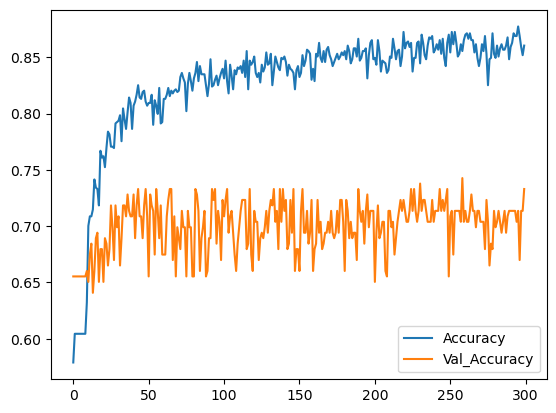

In [77]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend()

In [78]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7020 - loss: 827.5467 


### Conclusion

We read our dataset, which provides the usage ratios of the materials that are the building blocks of concrete strength, using the Pandas library. We performed data visualizations and EDA using Pandas, Seaborn, and Matplotlib libraries. Afterwards, we first created both regression and classification models using conventional methods, and then with the deep learning library Keras. As a result, we couldn't see a clear difference between conventional methods and Keras, as deep learning tends to perform better as the data volume increases. Nevertheless, we can say that in regression, we achieved better results with deep learning.